# 프로젝트 1

In [1]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [2]:
# x 준비하기
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [3]:
# y 준비하기
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [4]:
# train test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [5]:
# w와 b 준비
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [6]:
# 모델 준비
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
# 손실함수 평가 지표 MSE 준비
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [8]:
# 손실 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [9]:
# 미분 구하기 정의
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [10]:
LEARNING_RATE = 0.0001

In [11]:
#%%timeit이 적용되지 않아서 다른 방식으로 표현
import time

start = time.time()

# 모델 학습
global W, b
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

end = time.time()
print(f"학습 실행 시간: {end - start:.4f}초")


Iteration 100 : Loss 28503.6504
Iteration 200 : Loss 27622.6247
Iteration 300 : Loss 26776.1175
Iteration 400 : Loss 25962.7751
Iteration 500 : Loss 25181.2970
Iteration 600 : Loss 24430.4336
Iteration 700 : Loss 23708.9845
Iteration 800 : Loss 23015.7961
Iteration 900 : Loss 22349.7602
Iteration 1000 : Loss 21709.8121
학습 실행 시간: 0.1135초


In [12]:
# test 데이터로 성능 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(19012.880219984447)

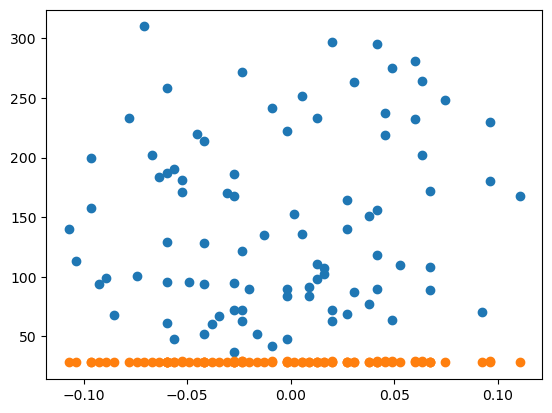

In [13]:
# 예측한 데이터 시각화
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 방법 1
lr이 0.001로하니 제대로 되지 않았다.
하이퍼 파라미터인 lr만 바꿔보자

In [14]:
import time

# 실험해볼 learning rate 리스트
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# 결과 저장용
results = {}

for lr in learning_rates:
    print(f"\n===== Learning Rate: {lr} =====")
    
    # W, b 초기화
    W = np.zeros_like(W)
    b = 0.0
    
    losses = []
    
    start = time.time()
    
    for i in range(1, 1001):
        dW, db = gradient(X_train, W, b, y_train)
        W -= lr * dW
        b -= lr * db
        L = loss(X_train, W, b, y_train)
        losses.append(L)
        if i % 100 == 0:
            print('Iteration %d : Loss %0.4f' % (i, L))
    
    end = time.time()
    duration = end - start
    
    final_loss = losses[-1] #맨마지막 losses
    print(f"Final Loss: {final_loss:.4f}")
    print(f"Time taken: {duration:.2f} sec")
    
    # 결과 저장
    results[lr] = {
        'final_loss': final_loss,
        'losses': losses,
        'W': W.copy(),
        'b': b,
        'time': duration
    }

print("\n=== 요약 ===")
for lr, info in results.items():
    print(f"LR: {lr} | Final Loss: {info['final_loss']:.4f} | Time: {info['time']:.2f} sec")



===== Learning Rate: 0.0001 =====
Iteration 100 : Loss 28783.5206
Iteration 200 : Loss 27892.0709
Iteration 300 : Loss 27035.5482
Iteration 400 : Loss 26212.5829
Iteration 500 : Loss 25421.8591
Iteration 600 : Loss 24662.1125
Iteration 700 : Loss 23932.1281
Iteration 800 : Loss 23230.7391
Iteration 900 : Loss 22556.8239
Iteration 1000 : Loss 21909.3053
Final Loss: 21909.3053
Time taken: 0.11 sec

===== Learning Rate: 0.001 =====
Iteration 100 : Loss 21903.5935
Iteration 200 : Loss 16669.4319
Iteration 300 : Loss 13159.6924
Iteration 400 : Loss 10805.4066
Iteration 500 : Loss 9225.3384
Iteration 600 : Loss 8164.0412
Iteration 700 : Loss 7450.3536
Iteration 800 : Loss 6969.5892
Iteration 900 : Loss 6644.9027
Iteration 1000 : Loss 6424.8038
Final Loss: 6424.8038
Time taken: 0.11 sec

===== Learning Rate: 0.01 =====
Iteration 100 : Loss 6409.3275
Iteration 200 : Loss 5924.6495
Iteration 300 : Loss 5843.5860
Iteration 400 : Loss 5771.8692
Iteration 500 : Loss 5702.4888
Iteration 600 : Loss

In [15]:
# LR이 0.9일 때 제일 손실이 적다.
# 최적의 W, b 가져오기
best_lr = min(results, key=lambda x: results[x]['final_loss'])
print("최적의 learning rate:", best_lr)



최적의 learning rate: 0.9


In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(29151.113097754103)

In [17]:
# 최적의 W, b 가져오기
best_W = results[best_lr]['W']
best_b = results[best_lr]['b']


In [18]:
# test 돌리기
prediction = model(X_test, best_W, best_b)
mse = loss(X_test, best_W, best_b, y_test)
mse

np.float64(2878.657974683904)

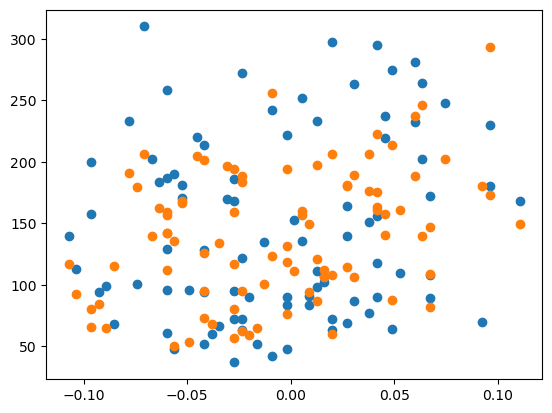

In [19]:
# 예측한 데이터 시각화
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 방법 2
lr을 0.01로 조절하고, iteration을 5만까지 늘려보자

In [20]:
LEARNING_RATE = 0.01

In [21]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 2000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 2000 : Loss 2897.8993
Iteration 4000 : Loss 2897.7901
Iteration 6000 : Loss 2897.6877
Iteration 8000 : Loss 2897.5914
Iteration 10000 : Loss 2897.5005
Iteration 12000 : Loss 2897.4143
Iteration 14000 : Loss 2897.3324
Iteration 16000 : Loss 2897.2542
Iteration 18000 : Loss 2897.1793
Iteration 20000 : Loss 2897.1074
Iteration 22000 : Loss 2897.0381
Iteration 24000 : Loss 2896.9712
Iteration 26000 : Loss 2896.9064
Iteration 28000 : Loss 2896.8435
Iteration 30000 : Loss 2896.7823
Iteration 32000 : Loss 2896.7226
Iteration 34000 : Loss 2896.6643
Iteration 36000 : Loss 2896.6071
Iteration 38000 : Loss 2896.5511
Iteration 40000 : Loss 2896.4961
Iteration 42000 : Loss 2896.4420
Iteration 44000 : Loss 2896.3888
Iteration 46000 : Loss 2896.3362
Iteration 48000 : Loss 2896.2843
Iteration 50000 : Loss 2896.2331
4.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 방법 3
사이킷런으로 구현해보기

In [22]:
# 데이터 가져오기
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [23]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)
print("X shape:", X.shape)

<class 'numpy.ndarray'> float64
X shape: (442, 10)


In [24]:
y = np.array(df_y)

print(type(y), y.dtype)
print("y shape:", y.shape)

<class 'numpy.ndarray'> float64
y shape: (442,)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
# 1. 모델 생성
lr_model = LinearRegression()

# 2. 모델 학습
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# 훈련셋 예측
y_train_pred = lr_model.predict(X_train)

# 훈련셋 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.4f}")


Train MSE: 2868.55, R²: 0.5279


In [29]:
# 테스트셋 예측
y_test_pred = lr_model.predict(X_test)

# 테스트셋 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.4f}")

Test MSE: 2900.19, R²: 0.4526


In [30]:
# 학습된 가중치 확인

print("Weights (coefficients):", lr_model.coef_)
print("Bias (intercept):", lr_model.intercept_)


Weights (coefficients): [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Bias (intercept): 151.34560453985995


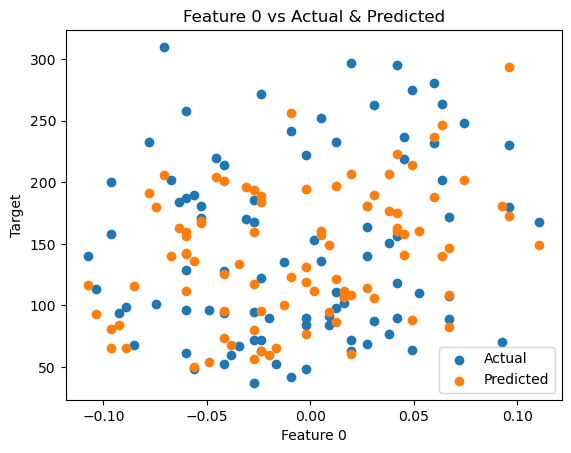

In [31]:
# x축에 feature 1개만 두고 시각화
plt.scatter(X_test[:, 0], y_test, label='Actual')
plt.scatter(X_test[:, 0], prediction, label='Predicted')
plt.xlabel('Feature 0')
plt.ylabel('Target')
plt.title('Feature 0 vs Actual & Predicted')
plt.legend()
plt.show()


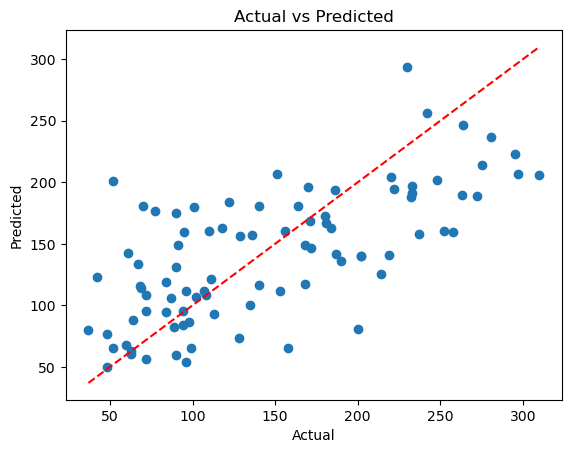

In [32]:
# 예측값 vs 실제값 산점도 그리기
plt.scatter(y_test, prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x 기준선
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


# 프로젝트 2

In [33]:
# 데이터 가져오기
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [34]:
# date time을 연,월,일,시,분으로 나누기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

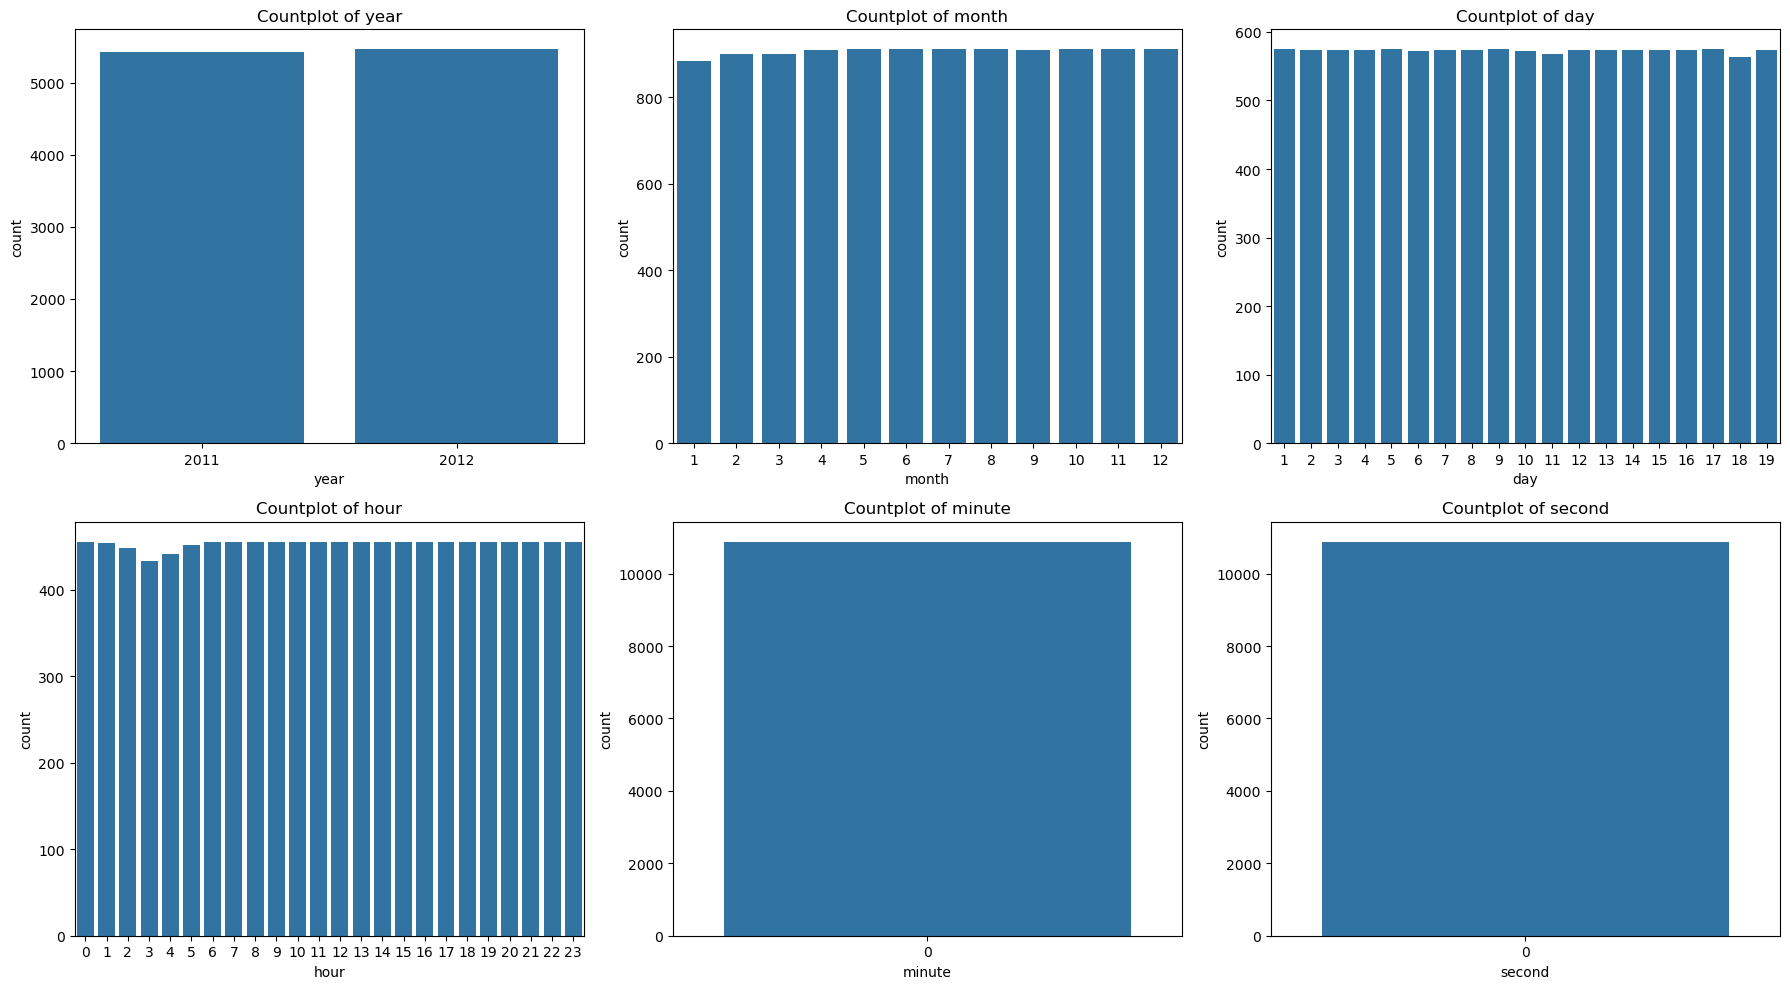

In [35]:
# 나눈 데이터를 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [36]:
# feature 선택하기 -> 'year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed'
# train test 데이터 분리
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
# 선형회귀 모델 가져오기
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
# 학습하기
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435438
RMSE: 141.2865946027274


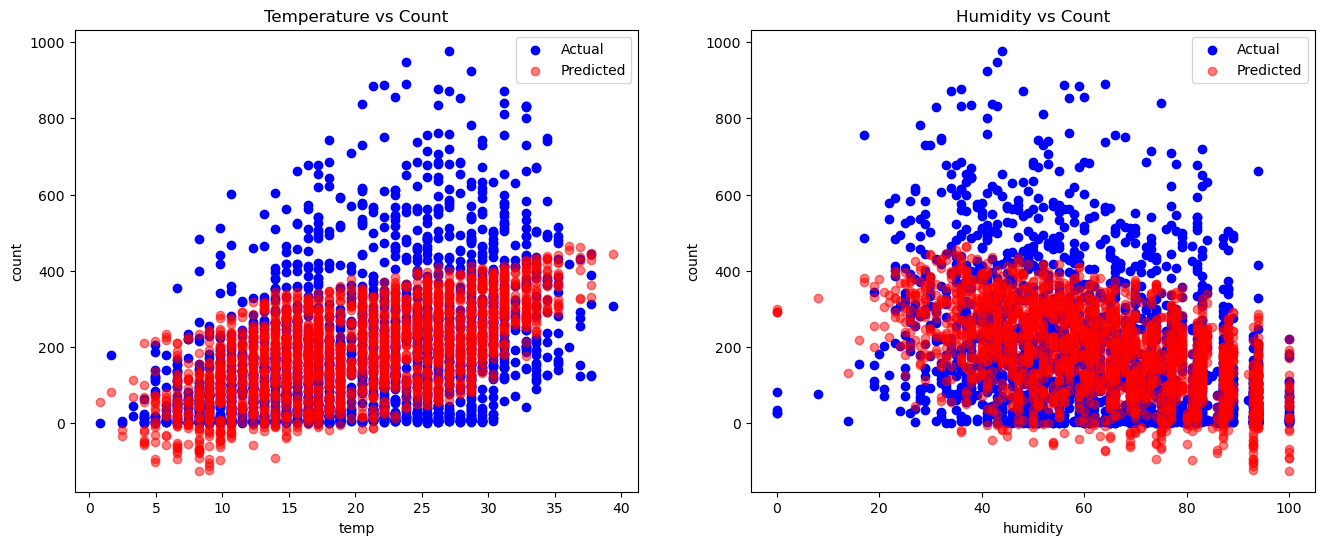

In [39]:
# temp와 humidity로 시각화하기
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

| 학습목표 | 평가기준 | 자가 진단 |
|----------|-----------|------------|
| 시각화 요구사항이 정확하게 이루어졌는가? | 각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다. | 데이터 개수 및 시각화 예측 완료 |
| 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가? | RMSE 값 150 이하를 달성 | RMSE 값 141 달성 |
| 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가? | MSE 손실함수값 3000 이하를 달성 | MSE 값 2878 달성 |
